# 공공재 모형 - 전력계약

## 사용자 편익에 대해서 생각해보자.
 - 단일 계약에서의 사용자 편익은 어떤 것으로 생각할 수 있을까?
 - 기본적으로 사용료 일것이다.
 - 하지만 이 사용료에 따른 그들의 선호도를 편익으로 적용해야 한다.
 - 테스트 데이터 : 398 가구의 6월 데이터의 25% 30% 구간을 이용한다.
 - 가정 1. 종합계약에 유리한 가구들이 있지만, 단일계약을 이용할 경우
 - 가정 2. 사회구성원은 A,B 두개로 나눈다. A는 단일계약의 분리한 가구들, B는 단일계약에 유리한 가구들

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from src.db import *
from src.objects import *
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import random as ran

pd.set_option("display.max_rows", 999)

plt.rcParams['figure.figsize'] = 15.7, 13.27
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
clean_col_1 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',

    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]
clean_col_1_ext_1 = [
    # Meter
    'APT METER','PUBLIC METER','종합계약 공동설비요금','단일계약 공동설비요금','종합계약 가구요금 Total','단일계약 가구요금 Total',
    # Total
    '종합계약 Total','단일계약 Total'
]

# 종합계약 비교
clean_col_2 = [
    '종합계약 Total','종합계약 공동설비요금','종합계약 평균청구금액','단일계약 Total','단일계약 공동설비요금','단일계약 평균청구금액',
]

# 최소요금 가구 비교
clean_col_3 = [
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)','종합계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)','단일계약 최소요금 가구 (최종청구금액)',
]

# 최대요금 가구 비교
clean_col_4 = [
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)','종합계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)','단일계약 최대요금 가구 (최종청구금액)',
]

clean_col_5 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액','최고 누진세 적용량 (kwh)',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',
    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]

clean_col_6 = [
    '종합계약 중간요금 가구 (name)','종합계약 중간요금 가구 (kwh)',
    '종합계약 중간요금 가구 (전기요금)','종합계약 중간요금 가구 (공동설비요금)','종합계약 중간요금 가구 (최종청구금액)',
    '단일계약 중간요금 가구 (name)','단일계약 중간요금 가구 (kwh)',
    '단일계약 중간요금 가구 (전기요금)','단일계약 중간요금 가구 (공동설비요금)','단일계약 중간요금 가구 (최종청구금액)',
]

progressive_col = [
    '최고 누진세 적용량 (kwh)'
]

In [4]:
DB = KETIDB()
DB.connect()
datas = DB.find()
household_name_list = datas.columns.values

### DB FIND START ###
### Data Process (dict -> dataframe) START ###
### DB FIND SUCCESS :) ###


In [5]:
basic_report_df = pd.DataFrame()
basic_report_dict = dict()

now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 10
PERCENTAGE_STEP = 1
LAST_STEP = 90
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households,
                      peak_df=ds.peak_df)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    mgmt_office_row_name = "[{}월] 관리사무소 청구서".format(now_month)
    public_row_name = "[{}월] 공동사용설비요금".format(now_month)
    households_row_name = "[{}월] 세대 전체 요금 합산".format(now_month)
    
    basic_report_dict['APT METER'] = ALL_RATE
    basic_report_dict['HOUSEHOLD METER'] = HOUSEHOLD_RATE
    basic_report_dict['PUBLIC METER'] = PUBLIC_RATE
    basic_report_dict['PUBLIC PERCENTAGE'] = PUBLIC_PERCENTAGE
    basic_report_dict['종합계약 Total'] = comp_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 가구요금 Total'] = comp_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 공동설비요금'] = comp_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 평균청구금액'] = round(comp_bill.loc[household_name_list]['최종청구금액'].mean())
    basic_report_dict['단일계약 Total'] = single_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 가구요금 Total'] = single_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 공동설비요금'] = single_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 평균청구금액'] = round(single_bill.loc[household_name_list]['최종청구금액'].mean())
    
    comp_min = comp_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_min].index[0]
    
    basic_report_dict['종합계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최소요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최소요금 가구 (최종청구금액)'] = comp_min
    basic_report_dict['종합계약 최소요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최소요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_min = single_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = single_bill[single_bill['최종청구금액'] == single_min].index[0]
    basic_report_dict['단일계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최소요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최소요금 가구 (최종청구금액)'] = single_min
    basic_report_dict['단일계약 최소요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최소요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    min_damage_rate = comp_min - single_min
    basic_report_dict['최소요금 유리 계약'] = "종합계약" if min_damage_rate < 0 else "단일계약"
    basic_report_dict['최소요금 가구 손해액 (계약 반전)'] = (min_damage_rate * (-1)) if min_damage_rate < 0 else \
                                                    min_damage_rate
    
    comp_mean = comp_bill[(comp_bill['사용량 (kwh)'] > 200) & (comp_bill['사용량 (kwh)'] <= 400)]['최종청구금액'].mean()
    household_name = comp_bill[comp_bill['최종청구금액'] >= comp_mean].index[0]
    comp_mean = comp_bill.loc[household_name]['최종청구금액']
    basic_report_dict['종합계약 중간요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 중간요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 중간요금 가구 (최종청구금액)'] = comp_mean
    basic_report_dict['종합계약 중간요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 중간요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_mean = single_bill[(single_bill['사용량 (kwh)'] > 200) & (single_bill['사용량 (kwh)'] <= 400)]['최종청구금액'].mean()
    household_name = single_bill[single_bill['최종청구금액'] >= single_mean].index[0]
    single_mean = single_bill.loc[household_name]['최종청구금액']
    basic_report_dict['단일계약 중간요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 중간요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 중간요금 가구 (최종청구금액)'] = single_mean
    basic_report_dict['단일계약 중간요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 중간요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    mean_damage_rate = comp_mean - single_mean
    basic_report_dict['중간요금 유리 계약'] = "종합계약" if mean_damage_rate < 0 else "단일계약"    
    basic_report_dict['중간요금 가구 손해액 (계약 반전)'] = (mean_damage_rate * (-1)) if mean_damage_rate < 0 else \
                                                    mean_damage_rate
    
    comp_max = comp_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_max].index[0]
    
    basic_report_dict['종합계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최대요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최대요금 가구 (최종청구금액)'] = comp_max
    basic_report_dict['종합계약 최대요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최대요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_max = single_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = single_bill[single_bill['최종청구금액'] == single_max].index[0]
    basic_report_dict['단일계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최대요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최대요금 가구 (최종청구금액)'] = single_max
    basic_report_dict['단일계약 최대요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최대요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    max_damage_rate = comp_max - single_max
    basic_report_dict['최대요금 유리 계약'] = "종합계약" if max_damage_rate < 0 else "단일계약"    
    basic_report_dict['최대요금 가구 손해액 (계약 반전)'] = (max_damage_rate * (-1)) if max_damage_rate < 0 else \
                                                    max_damage_rate
    
    basic_report_df = basic_report_df.append(
        pd.Series(
            basic_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

In [6]:
now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 10
PERCENTAGE_STEP = 1
LAST_STEP = 48
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

prevail_report_df = pd.DataFrame(
    columns=['종합계약 유리(평균 사용량)','종합계약 유리(가구 수)','종합계약 유리(평균 청구금액)', '종합계약 유리(평균 - 공동)'
             ,'종합계약 불리(평균 사용량)','종합계약 불리(가구 수)','종합계약 불리(평균 청구금액)', '종합계약 불리(평균 - 공동)', '종합계약 공동설비요금'
             ,'단일계약 유리(평균 사용량)','단일계약 유리(가구 수)', '단일계약 유리(평균 청구금액)', '단일계약 유리(평균 - 공동)'
             ,'단일계약 불리(평균 사용량)','단일계약 불리(가구 수)', '단일계약 불리(평균 청구금액)', '단일계약 불리(평균 - 공동)','단일계약 공동설비요금']
)

for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households,
                      peak_df=ds.peak_df)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    prevail_comp = comp_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()
    disprevail_comp = comp_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    prevail_single = single_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    disprevail_single = single_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()

    prevail_report_dict = dict()
    prevail_report_dict['종합계약 공동설비요금'] = comp_bill['공동전기사용료'][0]
    prevail_report_dict['종합계약 유리(가구 수)'] = len(prevail_comp)
    prevail_report_dict['종합계약 유리(평균 사용량)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 유리(평균 청구금액)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 유리(평균 - 공동)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean()) - prevail_comp['공동전기사용료'][0]
    prevail_report_dict['종합계약 불리(가구 수)'] = len(disprevail_comp)
    prevail_report_dict['종합계약 불리(평균 사용량)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 불리(평균 청구금액)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 불리(평균 - 공동)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean()) - disprevail_comp['공동전기사용료'][0]

    prevail_report_dict['단일계약 공동설비요금'] = single_bill['공동전기사용료'][0]
    prevail_report_dict['단일계약 유리(가구 수)'] = len(prevail_single)
    prevail_report_dict['단일계약 유리(평균 사용량)'] = 0 if len(prevail_single) == 0 else round(prevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 유리(평균 청구금액)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 유리(평균 - 공동)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean()) - prevail_single['공동전기사용료'][0]
    
    prevail_report_dict['단일계약 불리(가구 수)'] = len(disprevail_single)
    prevail_report_dict['단일계약 불리(평균 사용량)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 불리(평균 청구금액)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 불리(평균 - 공동)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean()) - disprevail_single['공동전기사용료'][0]
    
    prevail_report_df = prevail_report_df.append(
        pd.Series(
            prevail_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

In [7]:
prevail_report_df

,종합계약 유리(평균 사용량),종합계약 유리(가구 수),종합계약 유리(평균 청구금액),종합계약 유리(평균 - 공동),종합계약 불리(평균 사용량),종합계약 불리(가구 수),종합계약 불리(평균 청구금액),종합계약 불리(평균 - 공동),종합계약 공동설비요금,단일계약 유리(평균 사용량),단일계약 유리(가구 수),단일계약 유리(평균 청구금액),단일계약 유리(평균 - 공동),단일계약 불리(평균 사용량),단일계약 불리(가구 수),단일계약 불리(평균 청구금액),단일계약 불리(평균 - 공동),단일계약 공동설비요금
10%,90,47,8800,6111,244,351,34008,31319,2689,244,351,29187,25743,90,47,9368,5924,3444
11%,96,54,9681,6700,246,344,34721,31740,2981,246,344,30003,26068,96,54,10362,6427,3935
12%,110,72,11287,8010,251,326,36110,32833,3277,251,326,31334,26906,110,72,11968,7540,4428
13%,121,92,12716,9137,257,306,37696,34117,3579,257,306,32806,27885,121,92,13416,8495,4921
14%,129,108,13786,9901,262,290,39095,35210,3885,262,290,34130,28715,129,108,14555,9140,5415
15%,139,135,15163,10966,270,263,41458,37261,4197,270,263,36172,30264,139,135,15944,10036,5908
16%,145,151,16045,11531,275,247,43134,38620,4514,275,247,37686,31284,145,151,16913,10511,6402
17%,146,153,16439,11602,276,245,43634,38797,4837,276,245,38313,31417,146,153,17466,10570,6896
18%,146,153,16768,11602,276,245,43963,38797,5166,276,245,38969,31417,146,153,18122,10570,7552
19%,146,153,17102,11602,276,245,44297,38797,5500,276,245,39463,31417,146,153,18616,10570,8046


In [8]:
disprevail_single[prevail_comp['사용량 (kwh)'] >= 100].sort_values(by=['사용량 (kwh)']).index[0]

'아파트2-5-1209'

In [9]:
prevail_single

,사용량 (kwh),기본요금,전력량요금,기후환경요금,연료비조정액,필수사용량보장공제,전기요금계,부가세,4사 5입,전력산업기반기금,전력산업기반기금 (절사),청구금액,청구금액 (절사),공동전기사용료,최종청구금액
아파트4-103-109,515.0,6060.0,67339.0,2729.0,-1545.0,0.0,74583.0,7458.3,7458.0,2759.571,2750.0,84791.0,84790.0,41550,126340.0


# Pareto Efficiency

In [10]:
dis_target_name = disprevail_single[prevail_comp['사용량 (kwh)'] >= 100].sort_values(by=['사용량 (kwh)']).index[0]
target_name = prevail_single.index[0]

print("최소 사용량 가구 : {}\n".format(dis_target_name) +\
     "최대 사용량 가구 : {}\n".format(target_name))

최소 사용량 가구 : 아파트2-5-1209
최대 사용량 가구 : 아파트4-103-109



In [11]:
basic_20_report_df = pd.DataFrame()
basic_report_dict = dict()

now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 10
PERCENTAGE_STEP = 1
LAST_STEP = 48
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

min_household_info = list()
min_household_kwh = list()
max_household_info = list()
max_household_kwh = list()
public_info = list()

for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")
    
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    print("######## 최소가구 info ########\n" +\
          "최종청구금액: {}\n".format(single_bill.loc[dis_target_name]['최종청구금액']) +\
          "청구금액 percentage: {}\n".format(single_bill.loc[dis_target_name]['공동전기사용료'] / \
              single_bill.loc[dis_target_name]['최종청구금액']) +\
         "###########################\n")
    print("######## 최대가구 info ########\n" +\
      "최종청구금액: {}\n".format(single_bill.loc[target_name]['최종청구금액']) +\
      "청구금액 percentage: {}\n".format(single_bill.loc[target_name]['공동전기사용료'] / \
          single_bill.loc[target_name]['최종청구금액']) +\
     "###########################\n")
    
    public_info.append(PUBLIC_RATE)
    min_household_info.append(single_bill.loc[dis_target_name]['공동전기사용료'])
    min_household_kwh.append(single_bill.loc[dis_target_name]['사용량 (kwh)'])
    max_household_info.append(single_bill.loc[target_name]['공동전기사용료'])
    max_household_kwh.append(single_bill.loc[target_name]['사용량 (kwh)'])
    
    IPython.display.clear_output()

# 모든 사회구성원이 마찬가지로, 공공설비사용량이 많아져서,
# 많은 가격을 내는 것에  높은  효용을 보이지 않을 것 이다.

In [12]:
## 만약, 모든 사회구성원 A,B 가 공공설비사용량에 대한 본인들이 느끼는 효용성이 똑같다고 가정한다면,
## 같은 모양의 

14459.0
14459.0


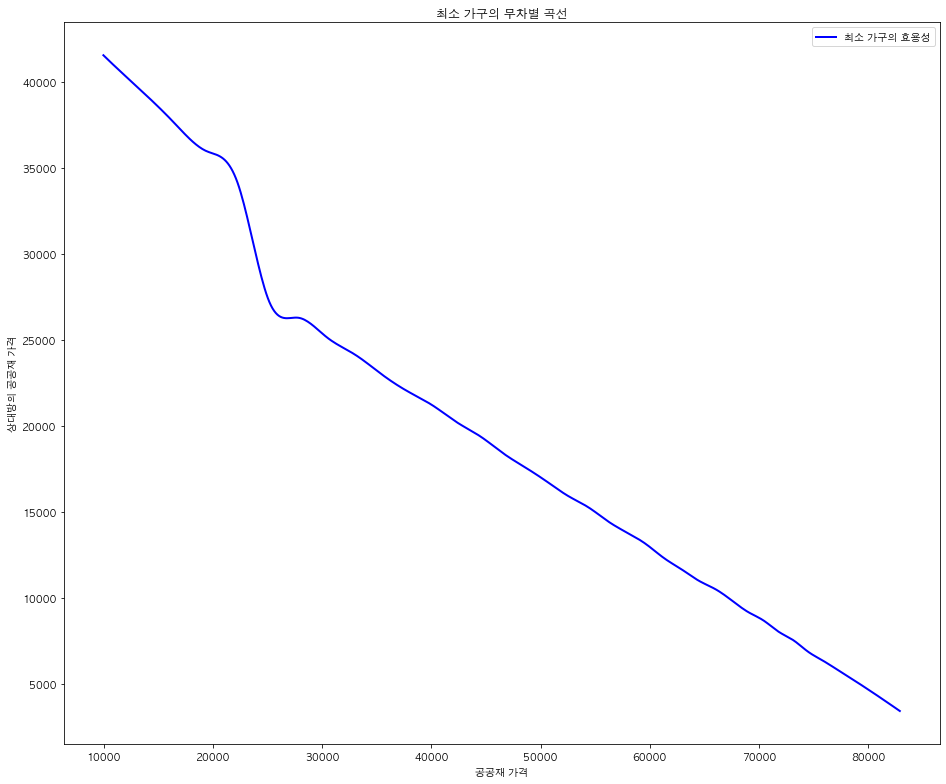

In [13]:
import numpy as np
from scipy.interpolate import make_interp_spline

public_info.reverse()
reverse_public_info = public_info.copy()
public_info.reverse()

# 반전
public_np = np.array(public_info)
mi_hi = np.array(max_household_info)
mx_hi = np.array(min_household_info)

mi_model=make_interp_spline(public_np, mi_hi)
mx_model=make_interp_spline(public_np, mx_hi)

mi_x = np.linspace(reverse_public_info[0],reverse_public_info[-1],500)
mi_y = mi_model(mi_x)

mx_x = np.linspace(reverse_public_info[0],reverse_public_info[-1],500)
mx_y = mx_model(mx_x)

print(np.median(mi_hi))
print(np.median(mx_hi))

plt.plot(mi_x[::-1], mi_y, color="blue", linewidth=2, label="최소 가구의 효용성")
# plt.plot(mx_x, mx_y[::-1], color="orange", linewidth=2, label="최대 가구의 효용성")

plt.xlabel("공공재 가격")
plt.ylabel("상대방의 공공재 가격")
plt.title("최소 가구의 무차별 곡선")
plt.legend()
plt.show()

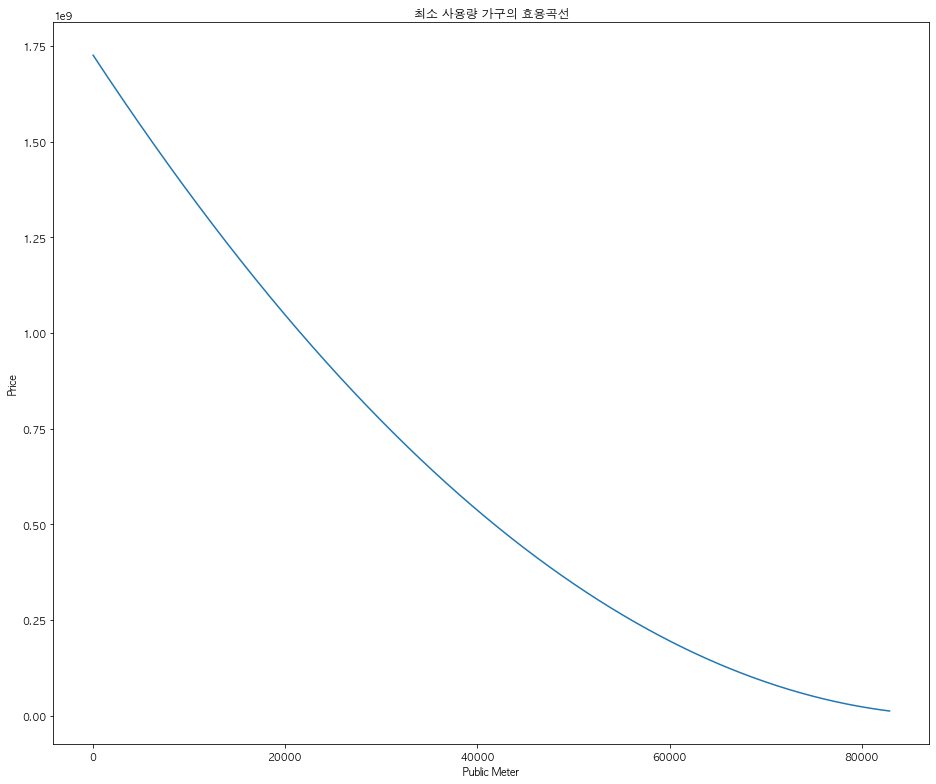

In [14]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

min_y = np.linspace(min_hi, max_hi, len(pi)) ** 2

max_y = np.linspace(min_hi, max_hi, len(pi)) ** 2

plt.plot(pi, np.flip(min_y))
plt.title("최소 사용량 가구의 효용곡선")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

In [15]:
min_hi

3444.0

41550.0 39629.857897802256
new three_line : 41550.0
new two_line : 41534.87521348776
41550.0 41550.0


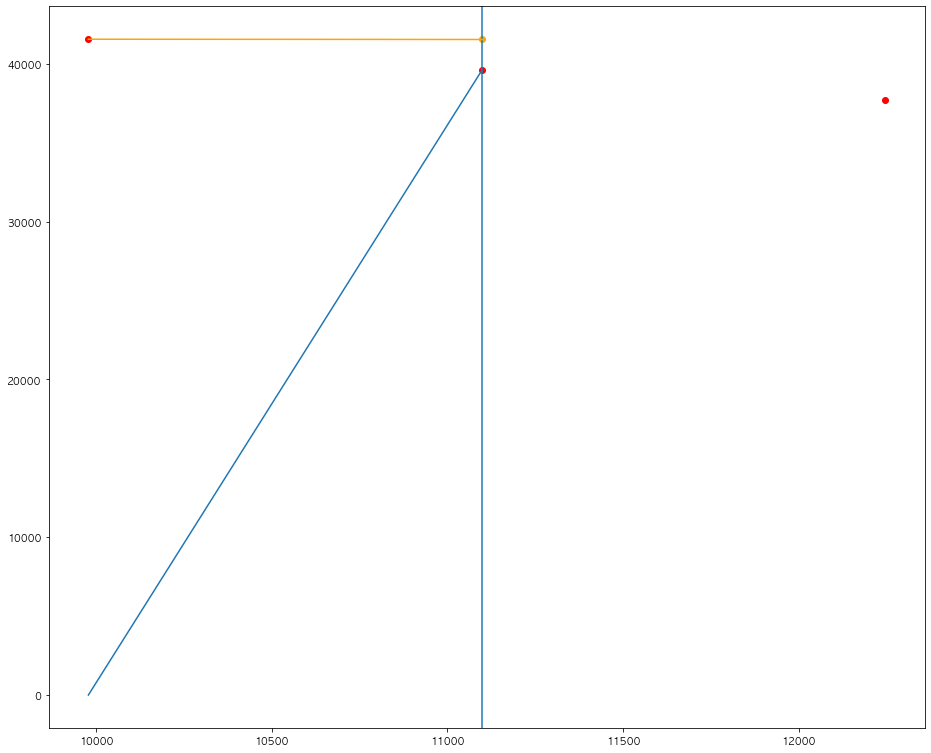

In [16]:
import math

mmhi = np.flip(min_household_info.copy())
pi = public_info.copy()

plt.scatter(pi[:3], mmhi[:3], color="r")
plt.axvline(x=pi[1])
plt.plot(pi[:2], [0, mmhi[1]])

# 밑변
one_line = pi[1] - pi[0]

# 높이
two_line = mmhi[1]

# 대각선
three_line = math.sqrt((one_line ** 2) + (two_line ** 2))
print(mmhi[0],three_line)

three_line = mmhi[0]
print("new three_line : {}".format(three_line))
two_line = math.sqrt((three_line ** 2) - (one_line ** 2))


print("new two_line : {}".format(two_line))
three_line = math.sqrt((one_line ** 2) + (two_line ** 2))
print(mmhi[0],three_line)

plt.scatter(pi[1],two_line, color="orange")
plt.plot(pi[:2], [mmhi[0], two_line], color="orange")

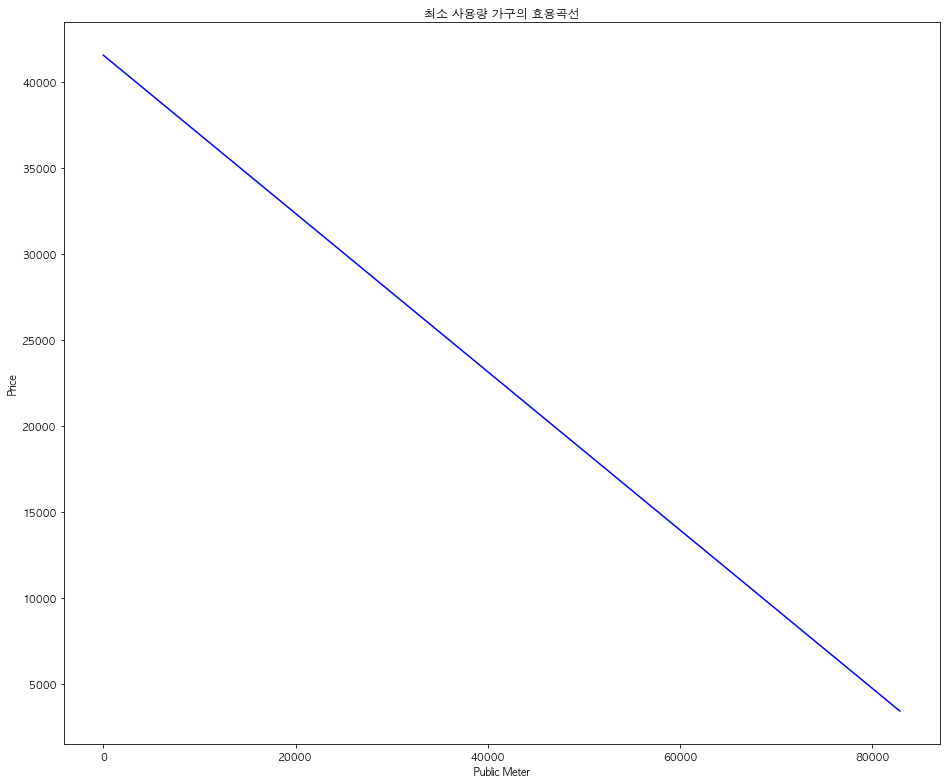

In [17]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

min_y = np.linspace(min_hi, max_hi, len(pi))

max_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, np.flip(min_y), color="blue")
plt.title("최소 사용량 가구의 효용곡선")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

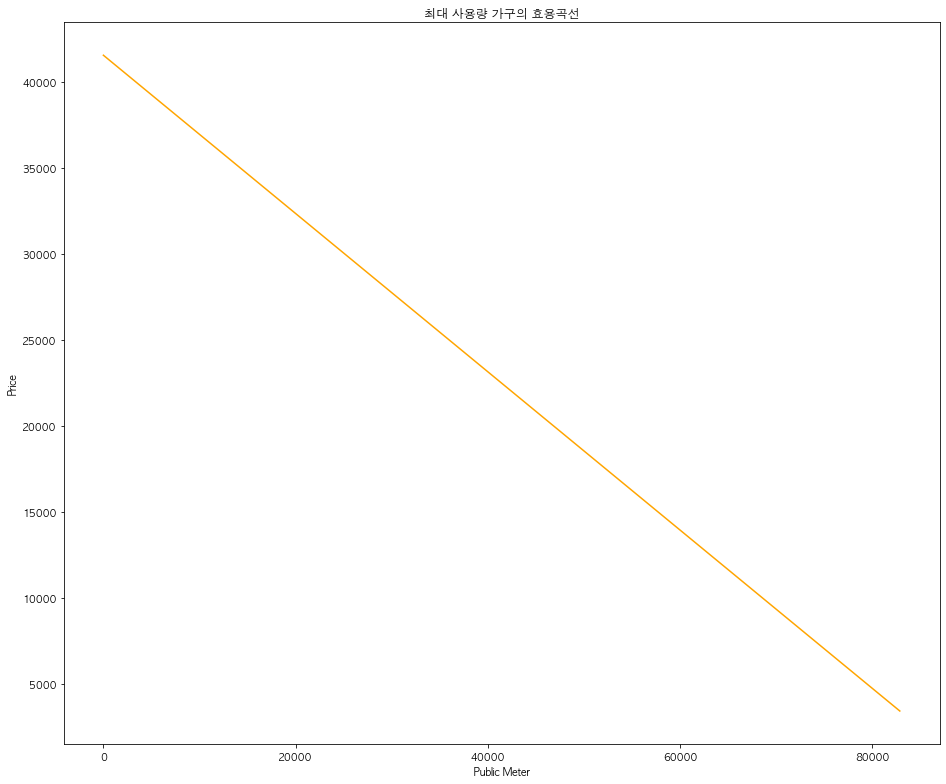

In [18]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

min_y = np.linspace(min_hi, max_hi, len(pi))

max_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, np.flip(max_y), color="orange")
plt.title("최대 사용량 가구의 효용곡선")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

In [19]:
len(public_info)

39

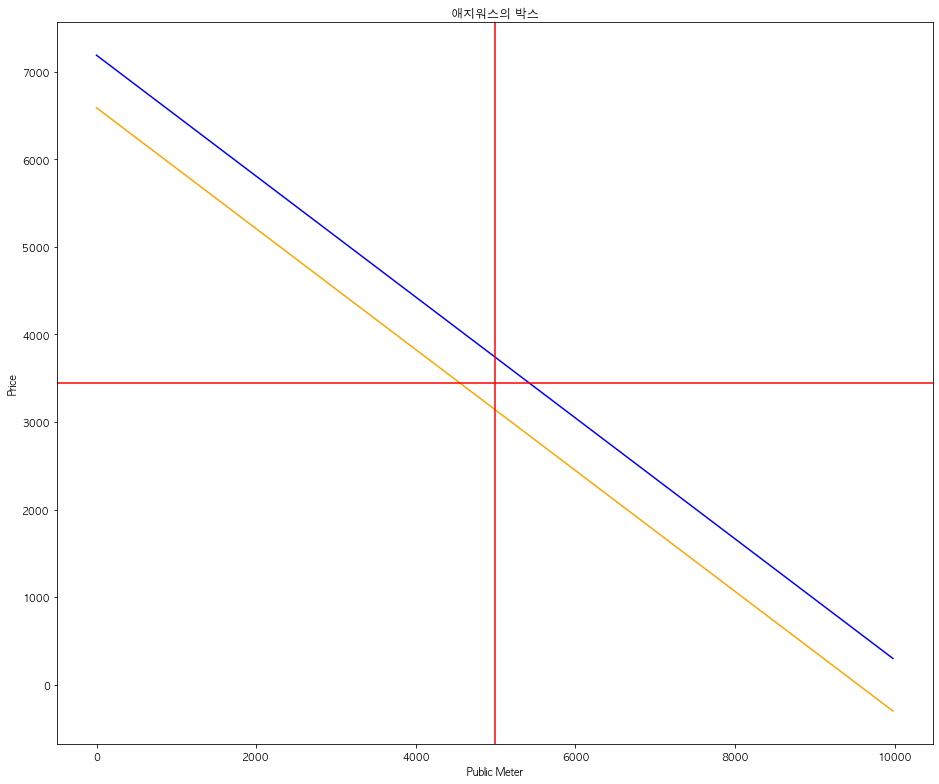

In [20]:
target_hi = min_household_info[0] * 2
target_pi = public_info[0]
median_pi_rate = min_household_info[0]

pi = np.arange(target_pi)
median_pi = target_pi / 2

min_y = np.linspace(0, target_hi, len(pi))
max_y = target_hi - np.flip(min_y)


plt.plot(pi, np.flip(min_y) - 300, color="orange")
plt.plot(pi, max_y[::-1] + 300, color="blue")
plt.axhline(y=median_pi_rate, color='red')
plt.axvline(x=median_pi, color='red')

plt.title("애지워스의 박스")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

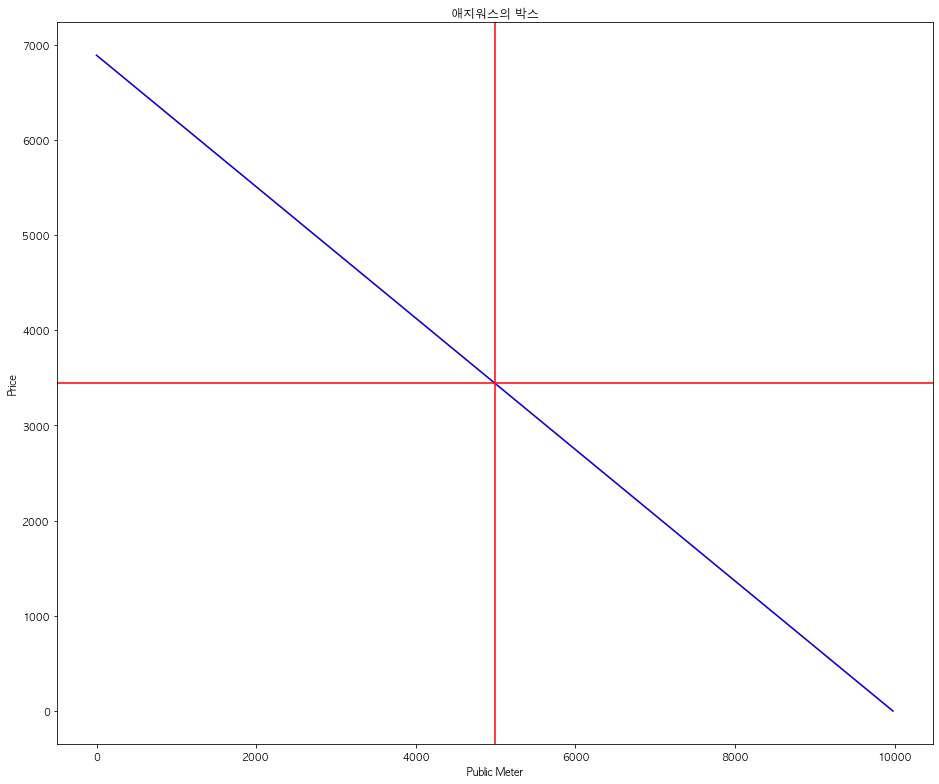

In [21]:
target_hi = min_household_info[0] * 2
target_pi = public_info[0]
median_pi_rate = min_household_info[0]

pi = np.arange(target_pi)
median_pi = target_pi / 2

min_y = np.linspace(0, target_hi, len(pi))
max_y = target_hi - np.flip(min_y)


plt.plot(pi, np.flip(min_y), color="orange")
plt.plot(pi, max_y[::-1], color="blue")
plt.axhline(y=median_pi_rate, color='red')
plt.axvline(x=median_pi, color='red')
plt.yticks(np.arange(0, 8000, 1000))

plt.title("애지워스의 박스")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

In [22]:
100 ** 0.98

91.20108393559097

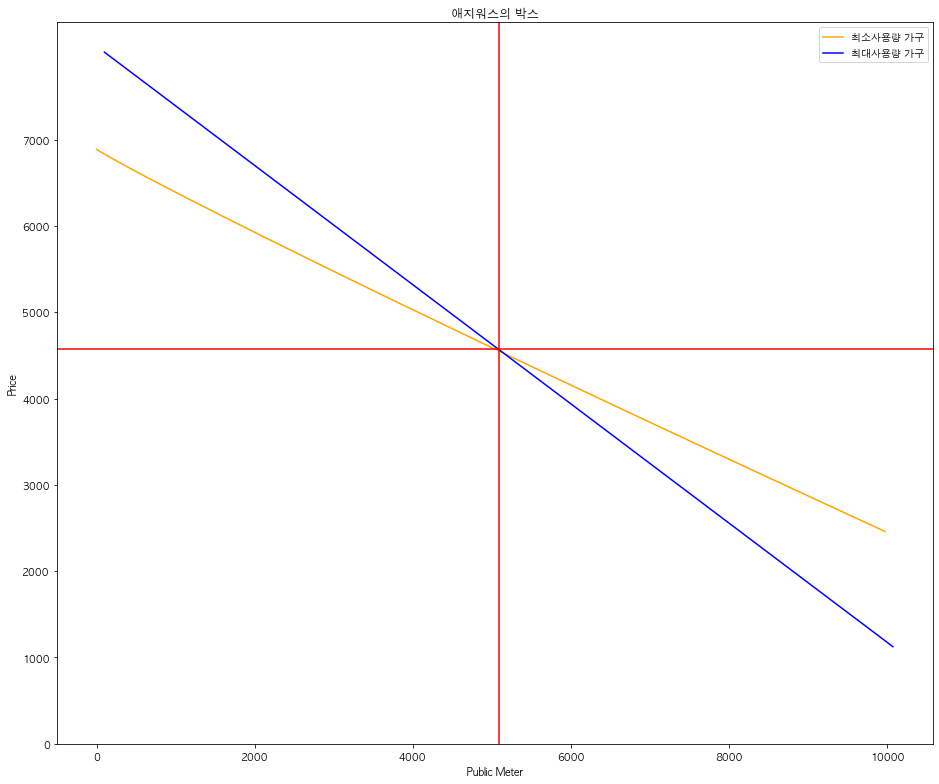

In [23]:
target_hi = min_household_info[0] * 2
target_pi = public_info[0]
median_pi_rate = min_household_info[0]

pi = np.arange(target_pi)
median_pi = target_pi / 2

min_y = target_hi - (np.linspace(0, target_hi, len(pi)) ** 0.95)
max_y = np.linspace(0, target_hi, len(pi))


plt.plot(pi, min_y, color="orange", label="최소사용량 가구")
plt.plot(pi + 100, max_y[::-1] + 1125, color="blue", label="최대사용량 가구")
plt.axhline(y=median_pi_rate + 1125, color='red')
plt.axvline(x=median_pi + 100, color='red')
plt.yticks(np.arange(0, 8000, 1000))

plt.title("애지워스의 박스")
plt.xlabel("Public Meter")
plt.ylabel("Price")
plt.legend()

plt.show()

# 보웬모형

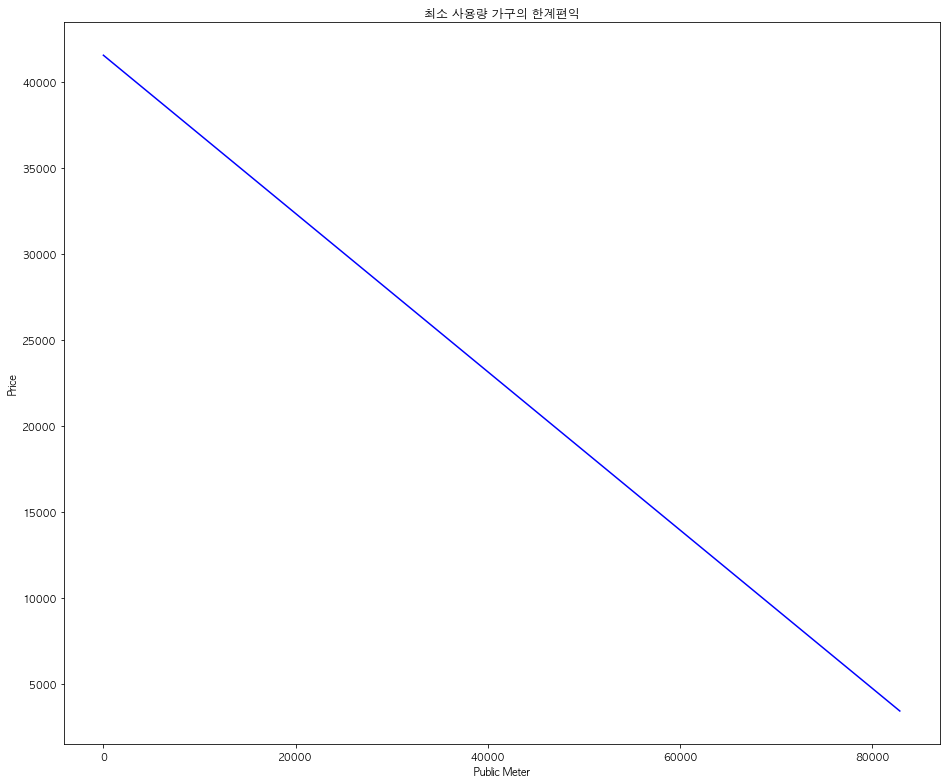

In [24]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

min_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, np.flip(min_y), color="blue")
plt.title("최소 사용량 가구의 한계편익")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

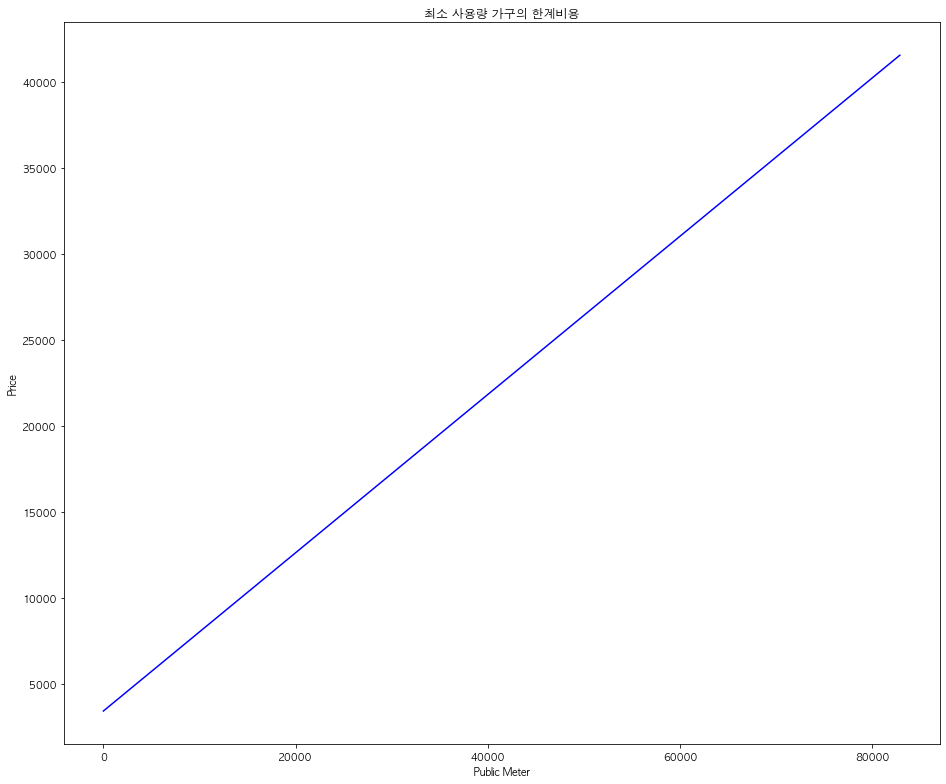

In [25]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

min_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, min_y, color="blue")
plt.title("최소 사용량 가구의 한계비용")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

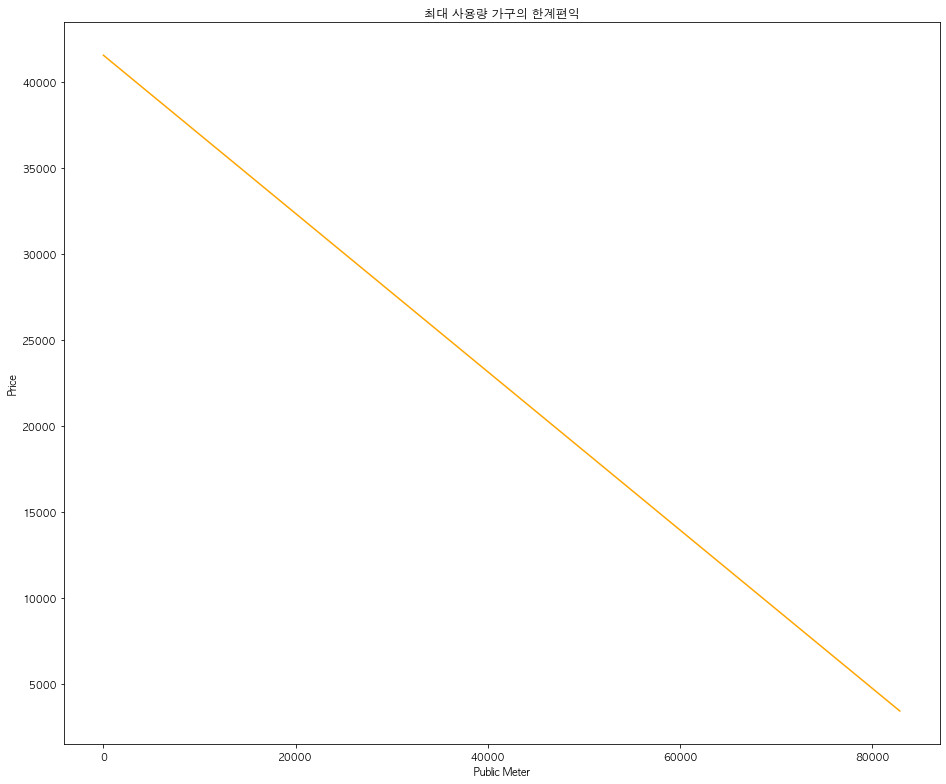

In [26]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

max_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, np.flip(max_y), color="orange")
plt.title("최대 사용량 가구의 한계편익")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

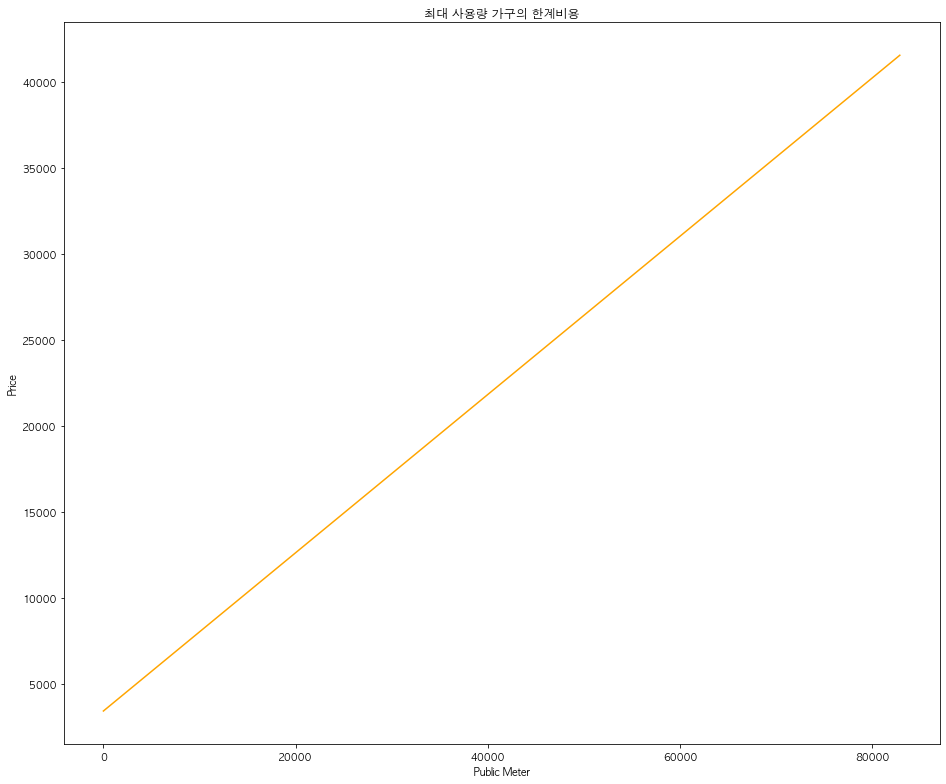

In [27]:
min_hi = min(max_household_info)
max_hi = max(max_household_info)
max_pi = max(public_info)

pi = np.arange(max_pi)

max_y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, max_y, color="orange")
plt.title("최대 사용량 가구의 한계비용")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

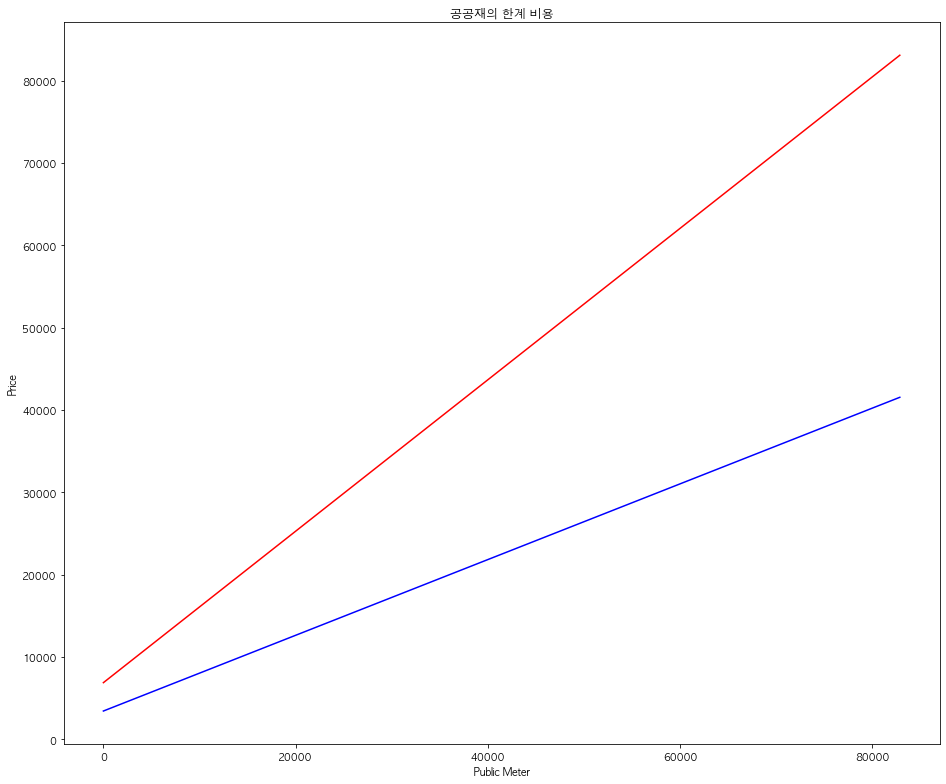

In [28]:
min_hi = min(max_household_info) * 2
max_hi = max(max_household_info) * 2
max_pi = max(public_info)

pi = np.arange(max_pi)

y = np.linspace(min_hi, max_hi, len(pi))

plt.plot(pi, y, color="red")
plt.plot(pi, min_y, color="blue")
plt.title("공공재의 한계 비용")
plt.xlabel("Public Meter")
plt.ylabel("Price")

plt.show()

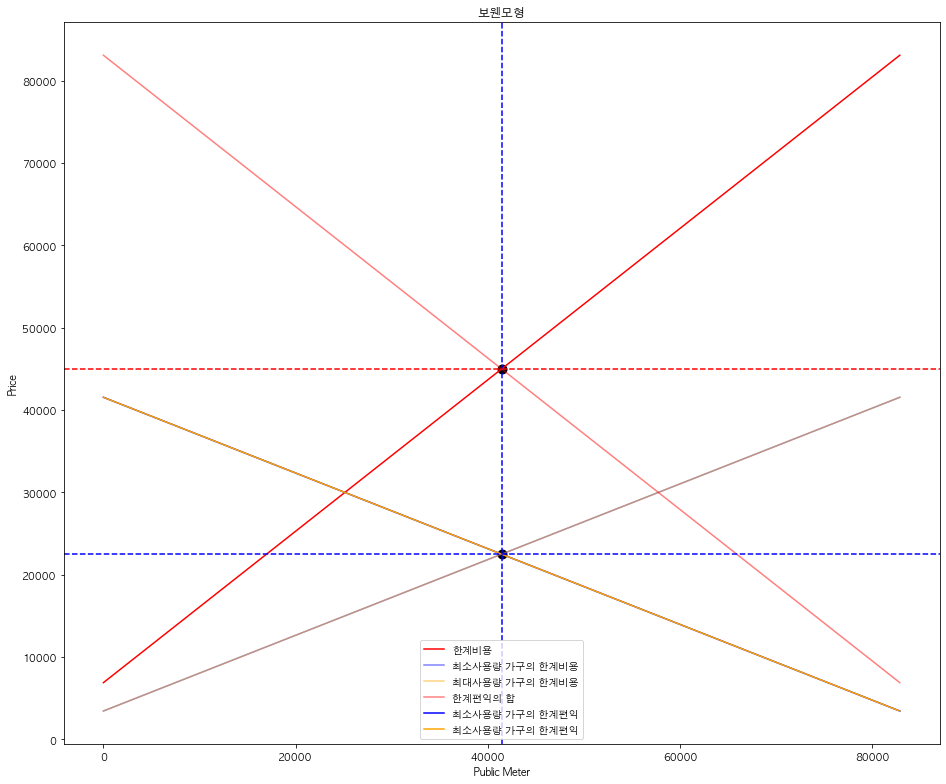

In [29]:
plt.plot(pi, y, color="red", label="한계비용", alpha=1)
plt.plot(pi, min_y, color="blue", label="최소사용량 가구의 한계비용", alpha=0.5)
plt.plot(pi, max_y, color="orange", label="최대사용량 가구의 한계비용", alpha=0.5)

plt.plot(pi, np.flip(y), color="red", label="한계편익의 합", alpha=0.5)
plt.plot(pi, np.flip(min_y), color="blue", label="최소사용량 가구의 한계편익", alpha=1)
plt.plot(pi, np.flip(max_y), color="orange", label="최소사용량 가구의 한계편익", alpha=1)

pc_idx = 0

pub_sel_y = np.flip(min_y)
for idx,_ in enumerate(y):
    if round(_) == round(pub_sel_y[idx] * 2):
        pc_idx = idx
        break
        
plt.axvline(x=pi[pc_idx], color="blue", linestyle="--")
plt.axhline(y=y[pc_idx] / 2, color="blue", linestyle="--")
plt.axhline(y=y[pc_idx], color="red", linestyle="--")

plt.scatter(pi[pc_idx], y[pc_idx] / 2, color="black", linewidth=4)
plt.scatter(pi[pc_idx], y[pc_idx], color="black", linewidth=4)

plt.title("보웬모형")

plt.xlabel("Public Meter")
plt.ylabel("Price")
plt.legend()
plt.show()

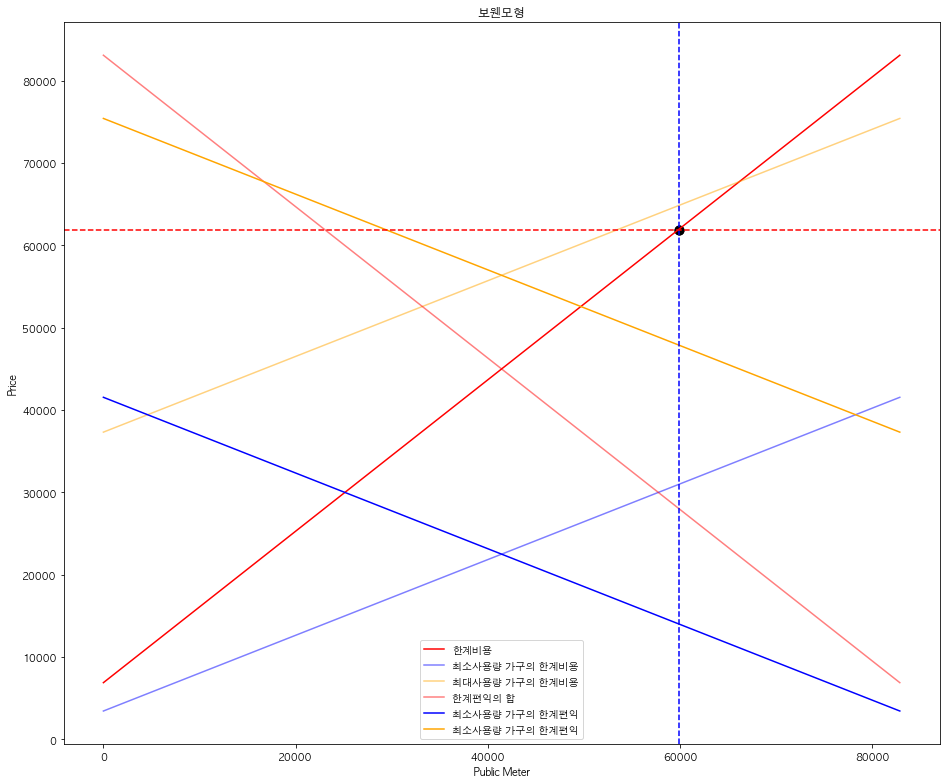

In [30]:
pc_idx = 30
target_pub = public_info[pc_idx]
sum_convenience = np.flip(min_y)[round(target_pub)] + np.flip(max_y)[round(target_pub)]
rate_err = y[round(target_pub)] - sum_convenience

plt.plot(pi, y, color="red", label="한계비용", alpha=1)
plt.plot(pi, min_y, color="blue", label="최소사용량 가구의 한계비용", alpha=0.5)
plt.plot(pi, max_y  + rate_err, color="orange", label="최대사용량 가구의 한계비용", alpha=0.5)

plt.plot(pi, np.flip(y), color="red", label="한계편익의 합", alpha=0.5)
plt.plot(pi, np.flip(min_y), color="blue", label="최소사용량 가구의 한계편익", alpha=1)
plt.plot(pi, np.flip(max_y) + rate_err, color="orange", label="최소사용량 가구의 한계편익", alpha=1)
        
plt.axvline(x=target_pub, color="blue", linestyle="--")
plt.axhline(y=y[round(target_pub)], color="red", linestyle="--")

plt.scatter(target_pub, y[round(target_pub)], color="black", linewidth=4)
plt.scatter(target_pub, sum_convenience + rate_err, color="black", linewidth=4)

plt.title("보웬모형")
plt.xlabel("Public Meter")
plt.ylabel("Price")
plt.legend()
plt.show()

# 린달모형

In [31]:
min_household_party = np.append(0,min_household_kwh[0] / pi[1:])
max_household_party = np.append(0,max_household_kwh[0] / pi[1:])

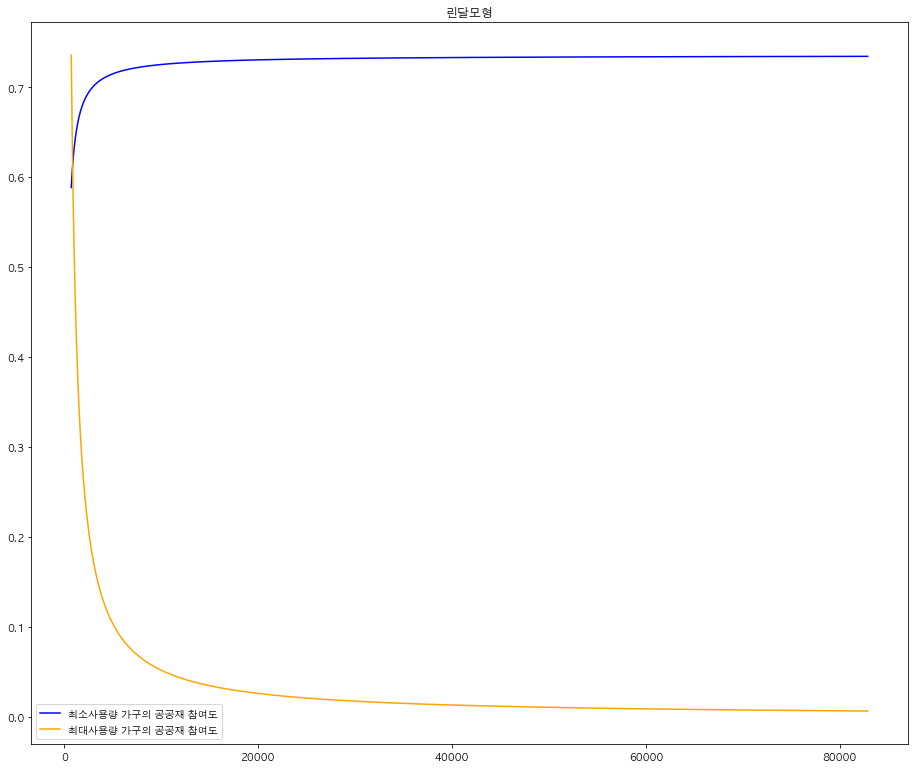

In [32]:
plt.plot(pi[700:], (max_household_party[700:].max() - min_household_party)[700:], color="blue", label="최소사용량 가구의 공공재 참여도")
plt.plot(pi[700:], max_household_party[700:], color="orange", label="최대사용량 가구의 공공재 참여도")

plt.title("린달모형")
plt.legend()
plt.show()

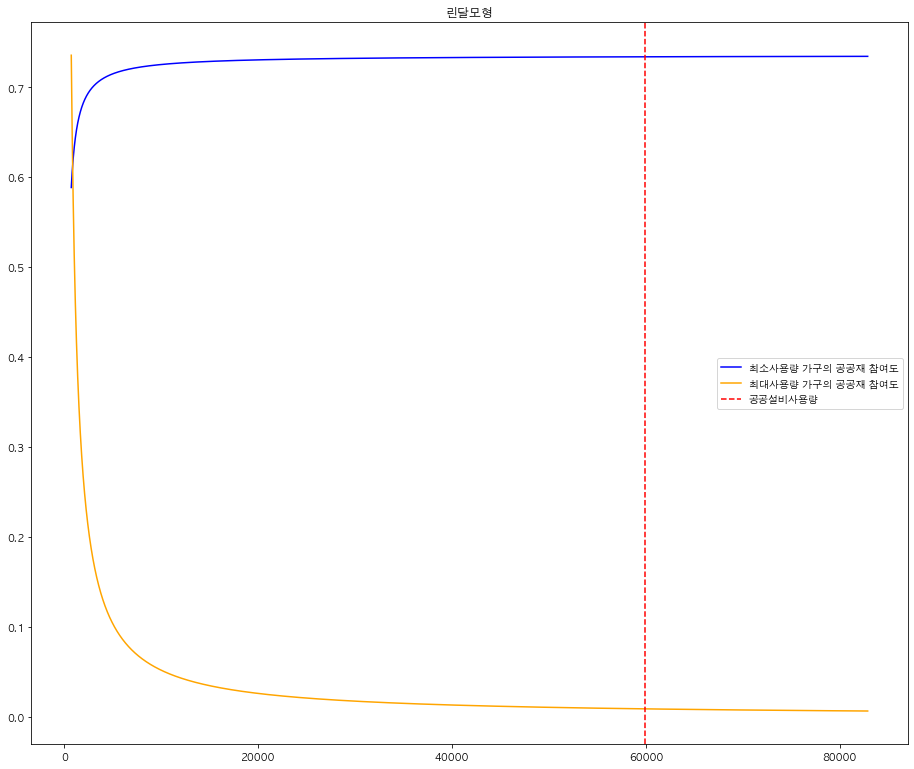

In [33]:
pc_idx = 30
target_pi = public_info[pc_idx]

test_pi = pi[700:]
test_min = (max_household_party[700:].max() - min_household_party[700:])
test_max = max_household_party[700:]

plt.plot(test_pi, test_min, color="blue", label="최소사용량 가구의 공공재 참여도")
plt.plot(test_pi, test_max, color="orange", label="최대사용량 가구의 공공재 참여도")
plt.axvline(x=target_pi, color="red", label="공공설비사용량", linestyle="--")

plt.title("린달모형")
plt.legend()
plt.show()

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


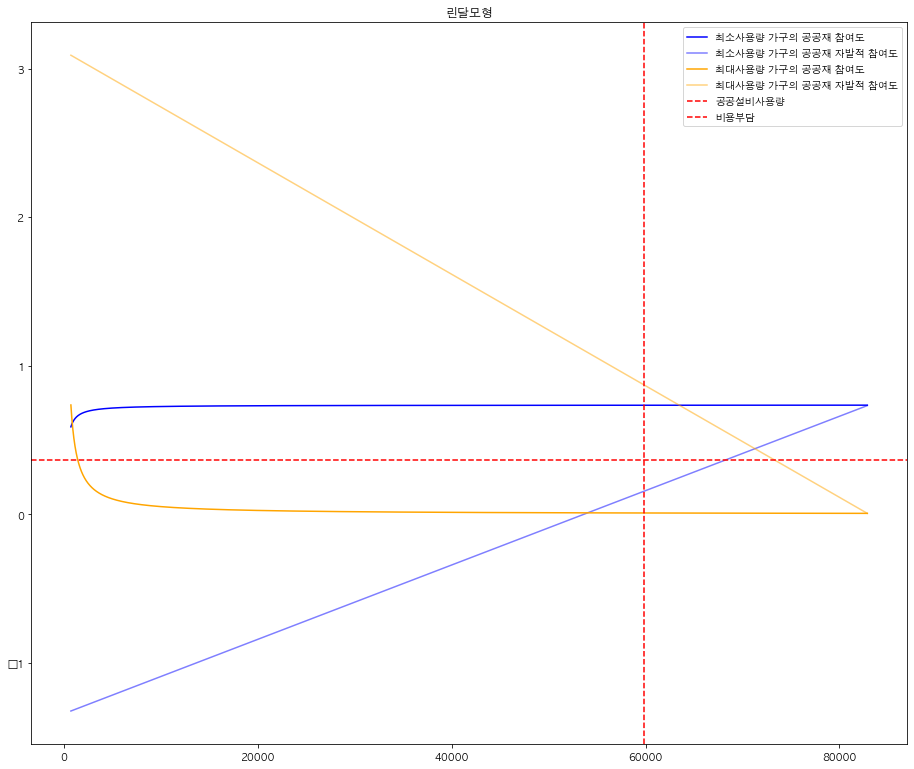

In [34]:
max_party = max_household_party[700:].max()
min_party = max_household_party[700:].min()

self_party_max = np.linspace(min_party,max_party * 4.2,len(test_pi))
self_party_min = (max_party - (self_party_max / 1.5))

plt.plot(test_pi, test_min, color="blue", label="최소사용량 가구의 공공재 참여도")
plt.plot(test_pi, np.flip(self_party_min), color="blue", alpha=0.5, label="최소사용량 가구의 공공재 자발적 참여도")
plt.plot(test_pi, test_max, color="orange", label="최대사용량 가구의 공공재 참여도")
plt.plot(test_pi, np.flip(self_party_max), color="orange", alpha=0.5, label="최대사용량 가구의 공공재 자발적 참여도")
plt.axvline(x=target_pi, color="red", label="공공설비사용량", linestyle="--")
plt.axhline(y=max_party / 2,color="red", label="비용부담", linestyle="--")

plt.title("린달모형")
plt.legend()
plt.show()

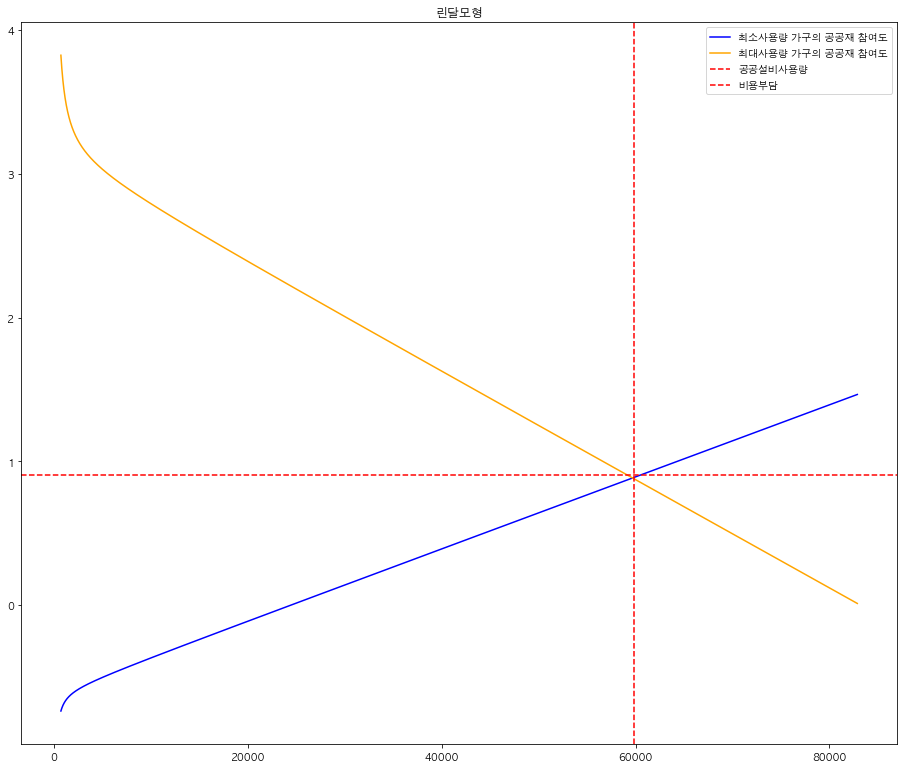

In [35]:
max_party = max_household_party[700:].max()
min_party = max_household_party[700:].min()

self_party_max = np.linspace(min_party,max_party * 4.2,len(test_pi))
self_party_min = (max_party - (self_party_max / 1.5))

new_test_min = test_min + np.flip(self_party_min)
new_test_max = test_max + np.flip(self_party_max)

plt.plot(test_pi, new_test_min, color="blue", label="최소사용량 가구의 공공재 참여도")
plt.plot(test_pi, new_test_max, color="orange", label="최대사용량 가구의 공공재 참여도")
plt.axvline(x=target_pi, color="red", label="공공설비사용량", linestyle="--")
plt.axhline(y=new_test_min[round(target_pi)],color="red", label="비용부담", linestyle="--")

plt.title("린달모형")
plt.legend()
plt.show()

In [36]:
max_percentage = (new_test_max.max() - new_test_min[round(target_pi)]) / new_test_max.max()
min_percentage = new_test_min[round(target_pi)] / new_test_max.max()

og_rate = (min_household_info[pc_idx] * 2)
max_rate = og_rate * max_percentage
min_rate = og_rate * min_percentage

print("공공설비사용요금: {}".format(og_rate))
print("최대사용량 가구 공공설비사용요금: {} -> {}".format(og_rate,round(max_rate)))
print("최소사용량 가구 공공설비사용요금: {} -> {}".format(og_rate,round(min_rate)))

공공설비사용요금: 48314.0
최대사용량 가구 공공설비사용요금: 48314.0 -> 36857
최소사용량 가구 공공설비사용요금: 48314.0 -> 11457


# 사무엘슨 모형

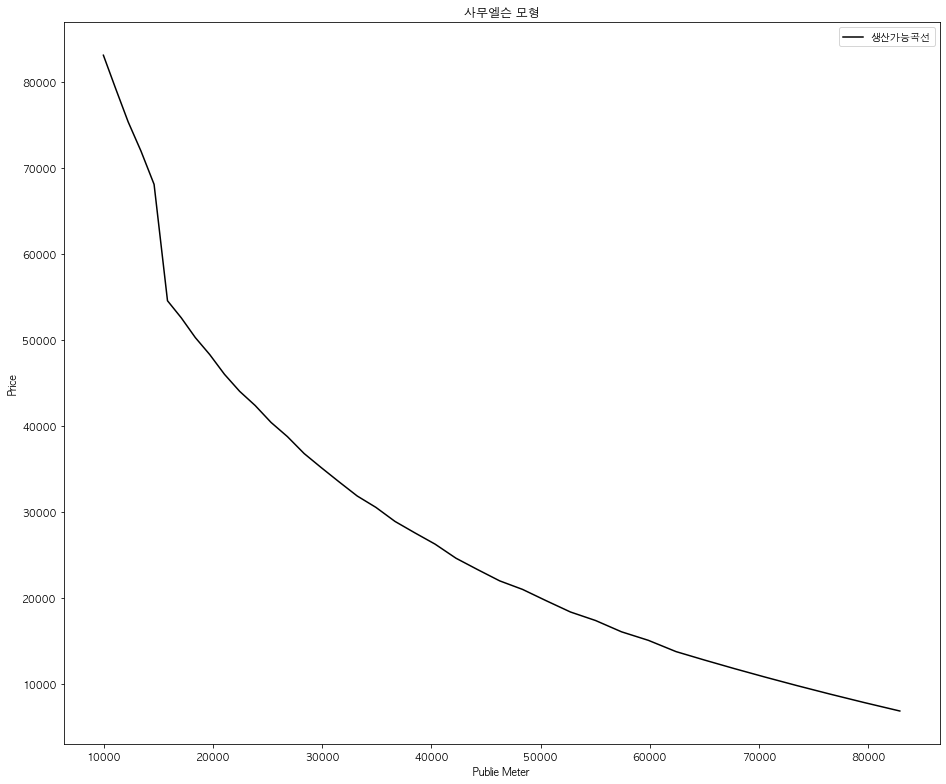

In [58]:
rate_arr = np.flip(np.array(prevail_report_df['단일계약 공동설비요금'].values) * 2)
elec_arr = np.array(basic_report_df['PUBLIC METER'].values)[:len(rate_arr)]

# print(min_household_info)
# print(max_household_info)
plt.plot(elec_arr, rate_arr, label="생산가능곡선", color="black")
plt.xlabel("Publie Meter")
plt.ylabel("Price")
plt.title("사무엘슨 모형")
plt.legend()
plt.show()

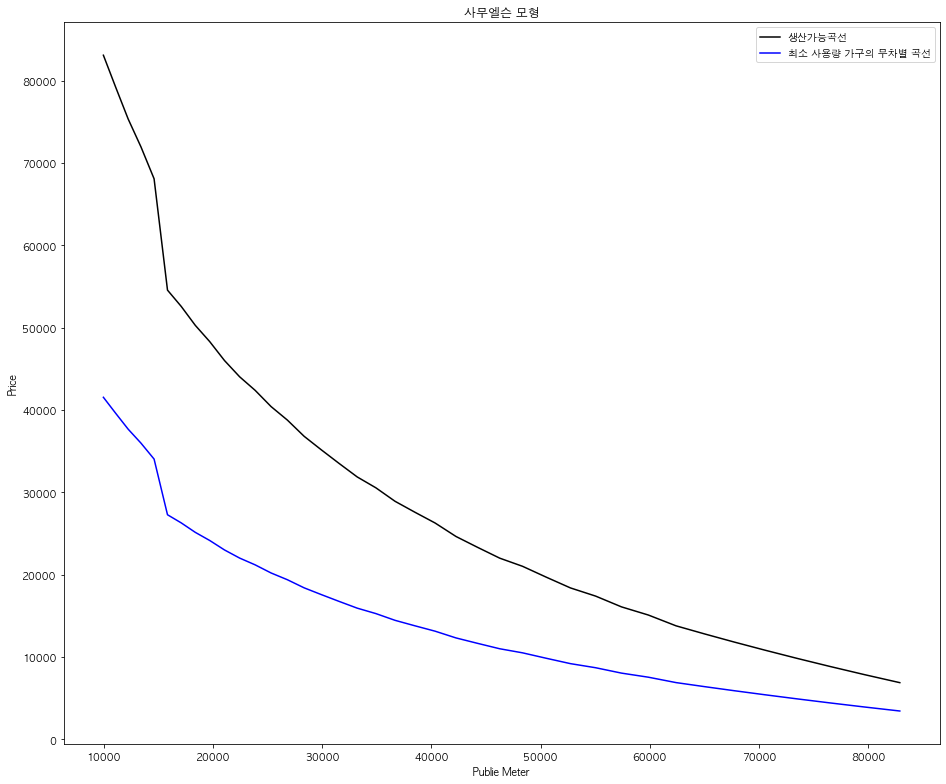

In [69]:
rate_arr = np.flip(np.array(prevail_report_df['단일계약 공동설비요금'].values) * 2)
elec_arr = np.array(basic_report_df['PUBLIC METER'].values)[:len(rate_arr)]
reverse_household_info = np.flip(min_household_info)

plt.plot(elec_arr, rate_arr, label="생산가능곡선", color="black", alpha=1)
plt.plot(elec_arr, reverse_household_info, label="최소 사용량 가구의 무차별 곡선", color="blue")
plt.xlabel("Publie Meter")
plt.ylabel("Price")
plt.title("사무엘슨 모형")
plt.legend()
plt.show()

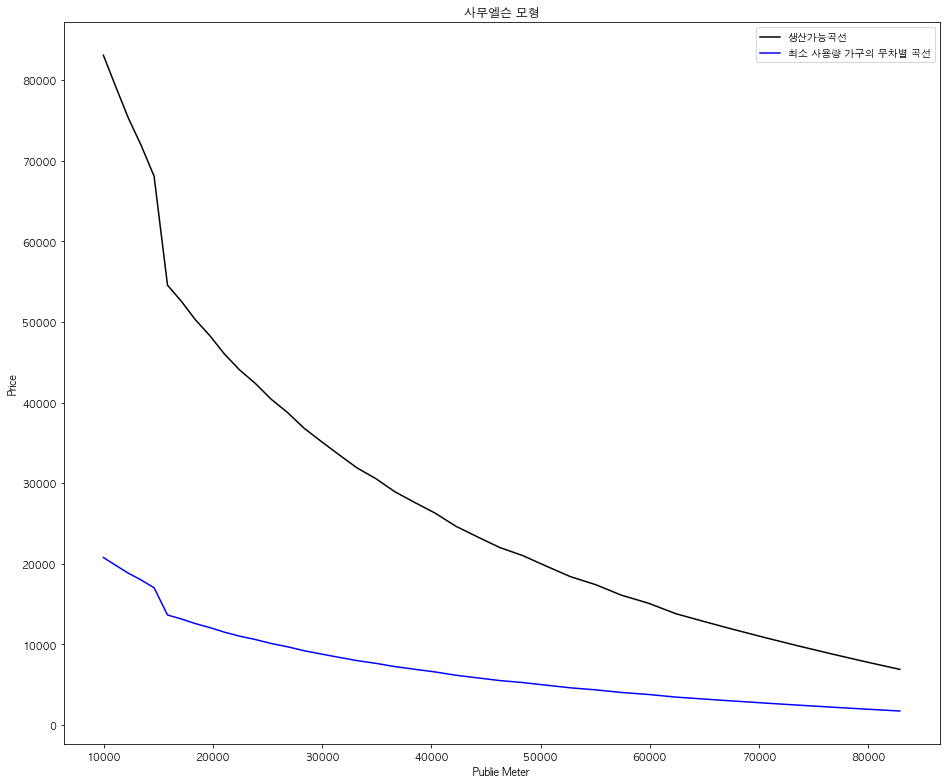

In [90]:
rate_arr = np.flip(np.array(prevail_report_df['단일계약 공동설비요금'].values) * 2)
elec_arr = np.array(basic_report_df['PUBLIC METER'].values)[:len(rate_arr)]
bad_household_info = np.array(min_household_info) / 2
reverse_household_info = np.flip((bad_household_info))

plt.plot(elec_arr, rate_arr, label="생산가능곡선", color="black")
plt.plot(elec_arr, reverse_household_info, label="최소 사용량 가구의 무차별 곡선", color="blue")
plt.xlabel("Publie Meter")
plt.ylabel("Price")
plt.title("사무엘슨 모형")
plt.legend()
plt.show()

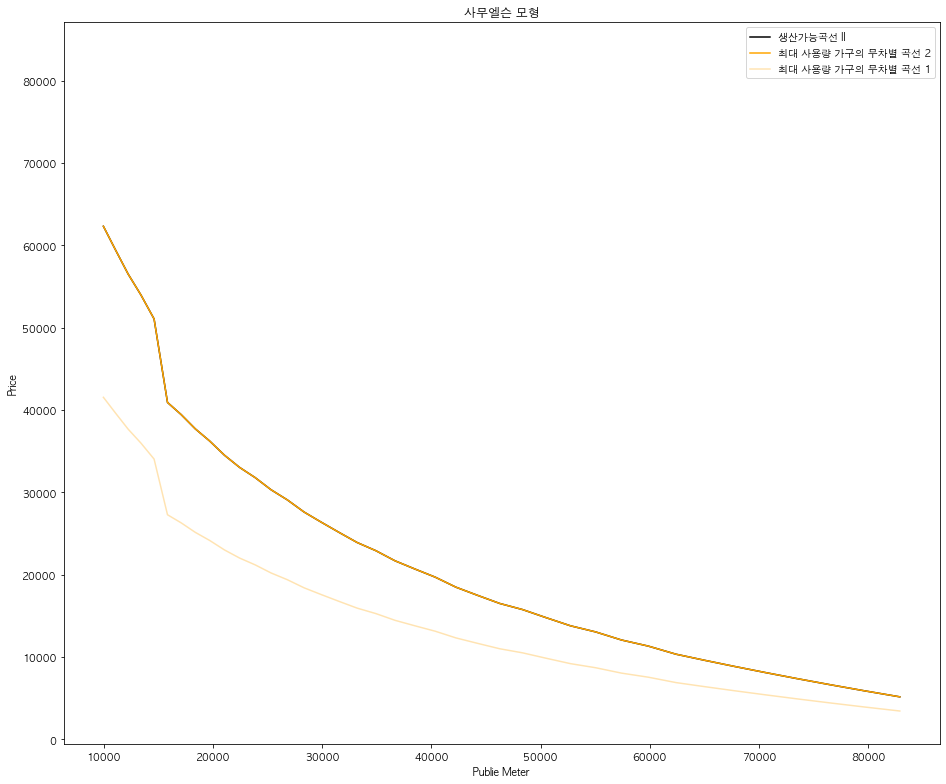

In [92]:
rate_arr = np.flip(np.array(prevail_report_df['단일계약 공동설비요금'].values) * 2)
bad_rate_arr = rate_arr - np.flip(bad_household_info)
elec_arr = np.array(basic_report_df['PUBLIC METER'].values)[:len(rate_arr)]
reverse_household_info = np.flip(min_household_info)

plt.plot(elec_arr, rate_arr, label="", color="black", alpha=0)
plt.plot(elec_arr, bad_rate_arr, label="생산가능곡선 II", color="black")
plt.plot(elec_arr, reverse_household_info + (bad_rate_arr - reverse_household_info), label="최대 사용량 가구의 무차별 곡선 2", color="orange", alpha=1)
plt.plot(elec_arr, reverse_household_info, label="최대 사용량 가구의 무차별 곡선 1", color="orange", alpha=0.3)
plt.xlabel("Publie Meter")
plt.ylabel("Price")
plt.title("사무엘슨 모형")
plt.legend()
plt.show()